# Kaggle Competition: House Prices: Advanced Regression Techniques

### Import libraries and load data

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sbn
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Part 1: Exploratory Data Analysis

In [3]:
train.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
290,291,60,RL,120.0,15611,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,233230
1214,1215,85,RL,69.0,10205,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,134500
745,746,60,RL,NaN,8963,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,299800
733,734,20,RL,80.0,10000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,Shed,400,3,2009,WD,Normal,131400
1106,1107,20,RL,114.0,10357,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,179900
828,829,60,RL,NaN,28698,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Abnorml,185000
1093,1094,20,RL,71.0,9230,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2006,WD,Normal,146000
655,656,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,WD,Family,88000
1007,1008,160,RM,21.0,2217,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,88000
280,281,60,RL,82.0,11287,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,228500


In [4]:
#Set Id to be index
train.set_index('Id',inplace=True)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [6]:
def count_feature_type(dataframe):
    numerical = 0
    numerical_cols = []
    categorical = 0
    categorical_cols = []
    for i in range(0,len(dataframe.columns)):
        if (dataframe[dataframe.columns[i]].dtype=='int64')|(dataframe[dataframe.columns[i]].dtype=='float64'):
            numerical+=1
            numerical_cols.append(dataframe.columns[i])
        else:
            categorical+=1
            categorical_cols.append(dataframe.columns[i])
    print('Numerical - {}, Categorical - {}'.format(numerical,categorical))
    
    return (numerical_cols,categorical_cols,numerical,categorical)
    
def plot_categorical(column):
    if train[column].nunique()<=10:
        plt.hist(train[column],bins=20)
        plt.title(column)
        plt.show()
    else:
        table = train[[column,'SalePrice']].groupby(column).count().sort_values(by='SalePrice',
                                                                                        ascending=False)
        table.rename(columns={'SalePrice':'Frequency'},inplace=True)
        print(table)
        
def plot_numerical(column):
    train[column].dropna(inplace=True)
    sbn.distplot(train[column])
    plt.axvline(train[column].mean(),color='red',label='Mean')
    plt.axvline(train[column].median(),color='yellow',label='Median')
    plt.xlabel('')
    plt.legend()
    plt.title(column)
    plt.show()

Numerical - 37, Categorical - 43


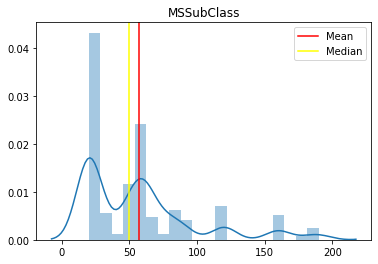

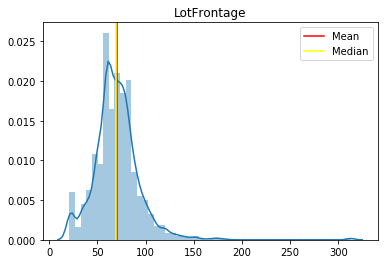

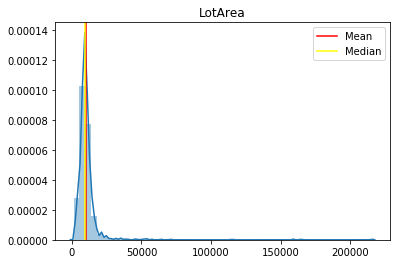

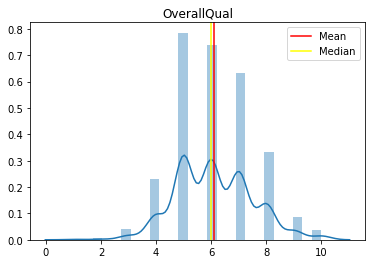

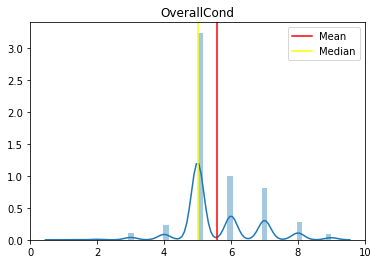

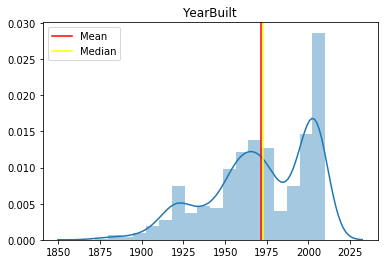

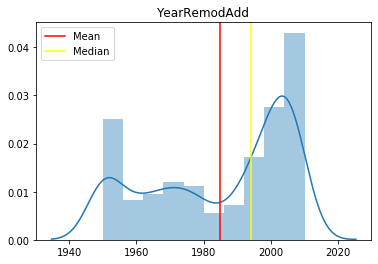

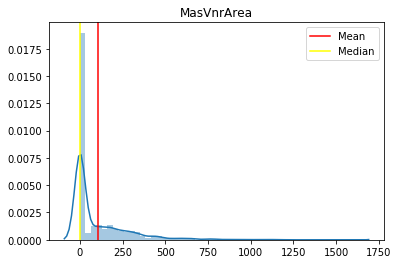

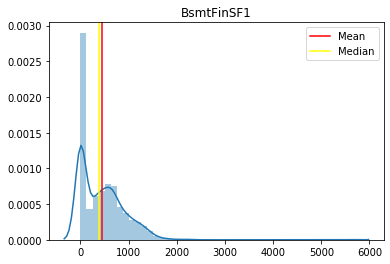

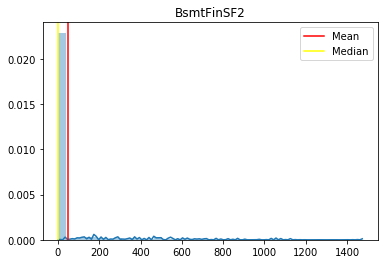

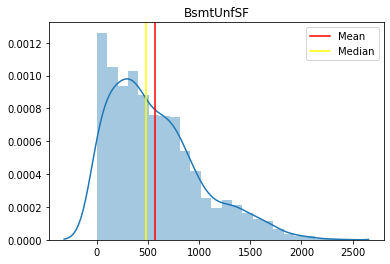

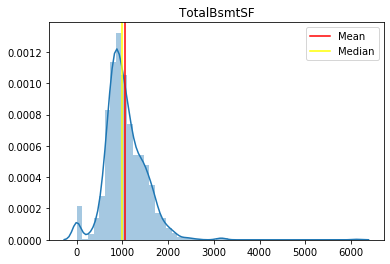

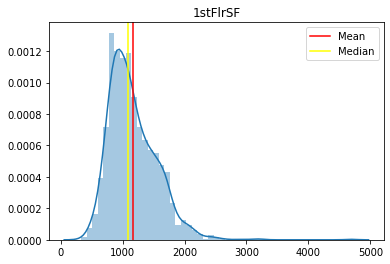

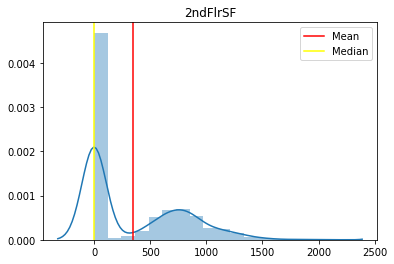

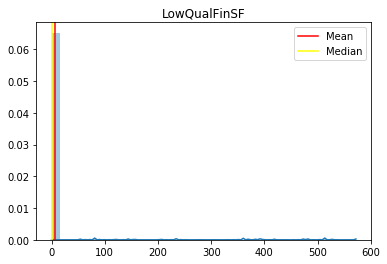

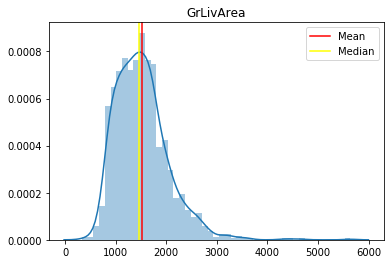

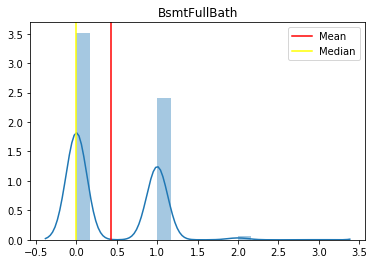

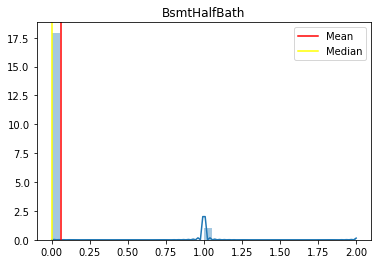

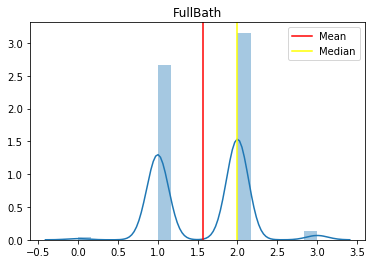

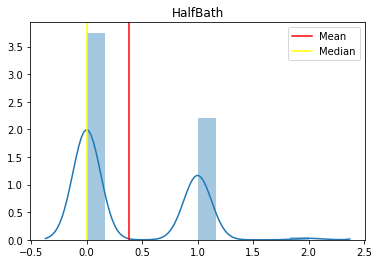

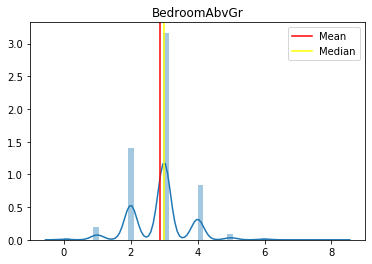

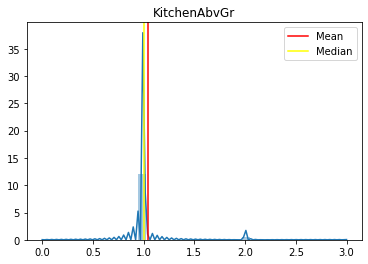

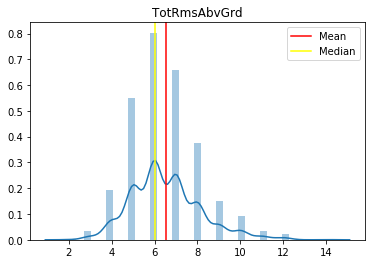

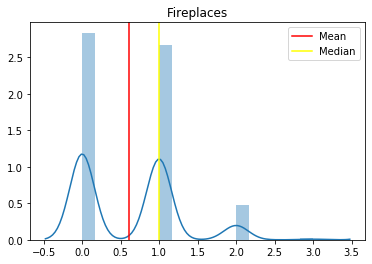

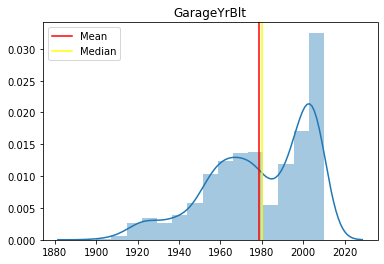

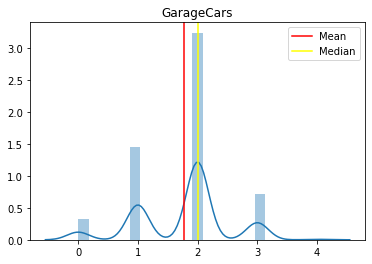

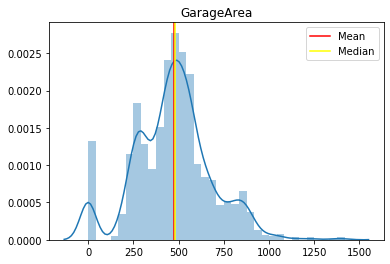

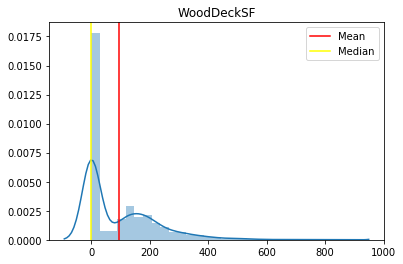

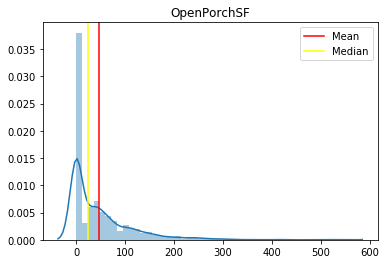

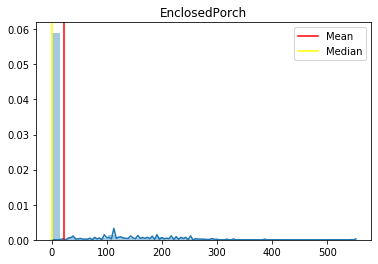

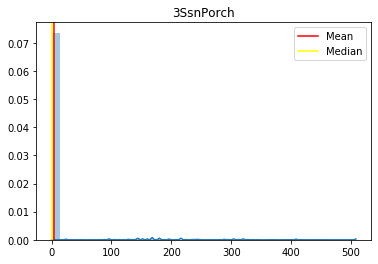

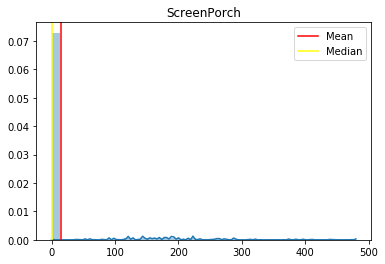

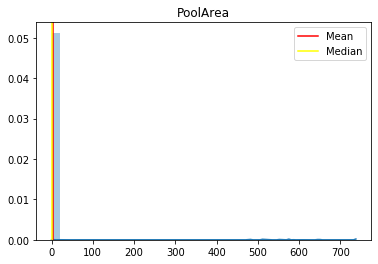

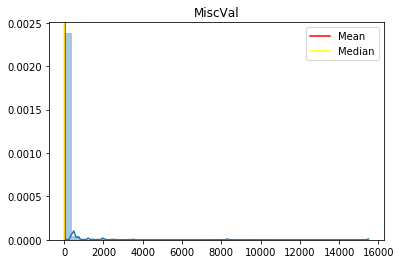

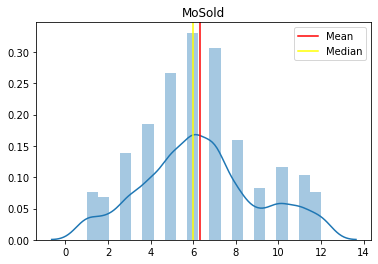

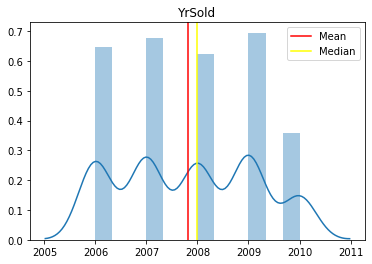

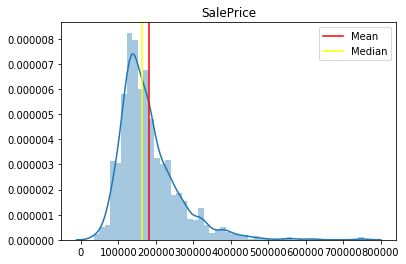

In [680]:
#Plot all numerical features

[num_cols,cat_cols,num,cat] = count_feature_type(train)

for i in range(0,num):
    train[num_cols[i]].dropna(inplace=True)
    plot_numerical(num_cols[i])

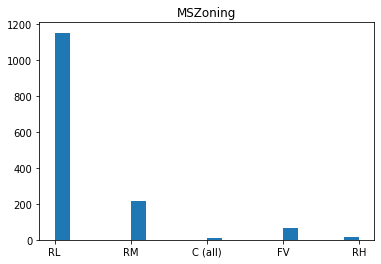

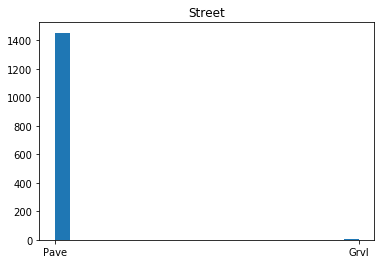

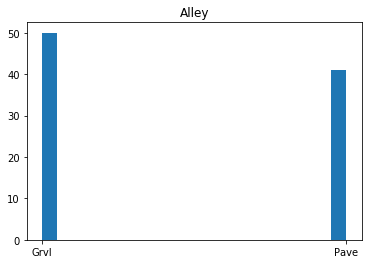

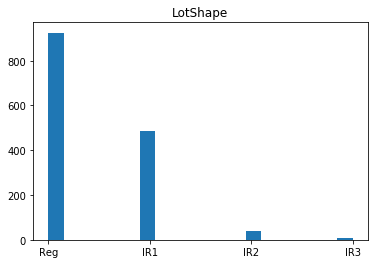

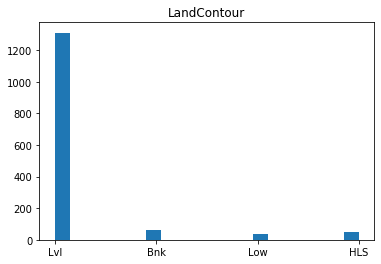

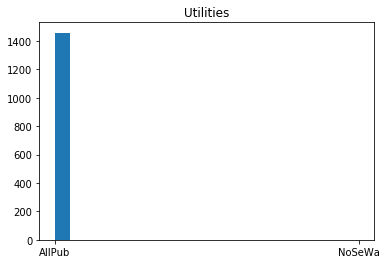

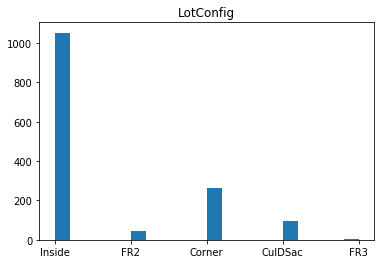

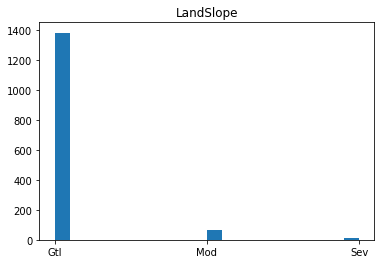

              Frequency
Neighborhood           
NAmes               225
CollgCr             150
OldTown             113
Edwards             100
Somerst              86
Gilbert              79
NridgHt              77
Sawyer               74
NWAmes               73
SawyerW              59
BrkSide              58
Crawfor              51
Mitchel              49
NoRidge              41
Timber               38
IDOTRR               37
ClearCr              28
StoneBr              25
SWISU                25
Blmngtn              17
MeadowV              17
BrDale               16
Veenker              11
NPkVill               9
Blueste               2


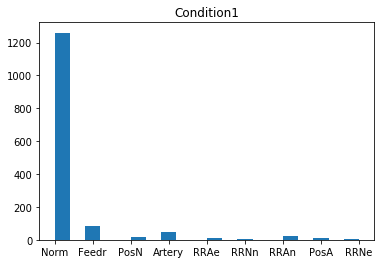

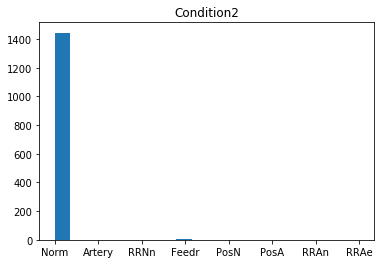

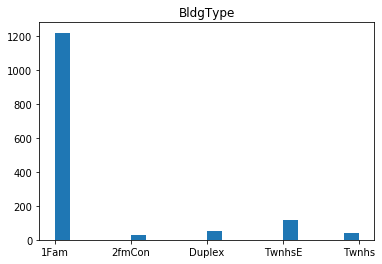

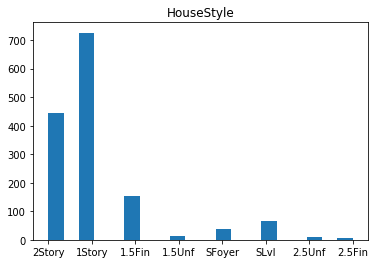

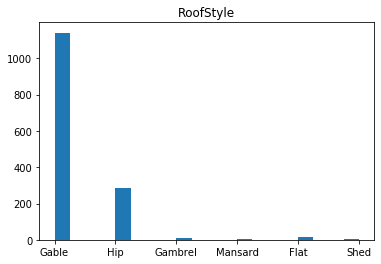

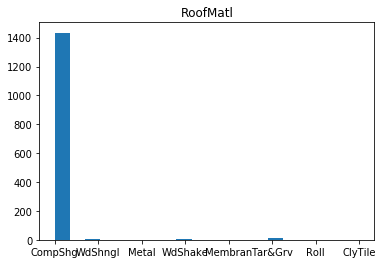

             Frequency
Exterior1st           
VinylSd            515
HdBoard            222
MetalSd            220
Wd Sdng            206
Plywood            108
CemntBd             61
BrkFace             50
WdShing             26
Stucco              25
AsbShng             20
BrkComm              2
Stone                2
AsphShn              1
CBlock               1
ImStucc              1
             Frequency
Exterior2nd           
VinylSd            504
MetalSd            214
HdBoard            207
Wd Sdng            197
Plywood            142
CmentBd             60
Wd Shng             38
Stucco              26
BrkFace             25
AsbShng             20
ImStucc             10
Brk Cmn              7
Stone                5
AsphShn              3
CBlock               1
Other                1


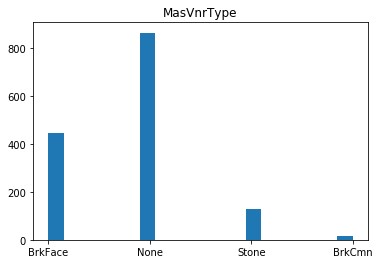

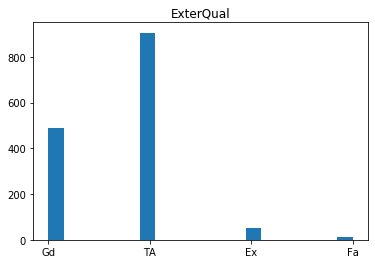

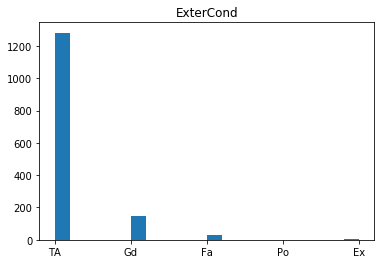

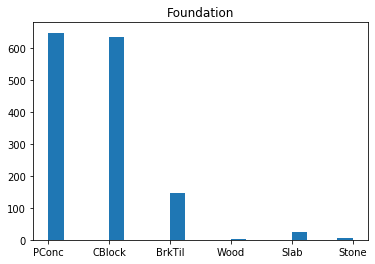

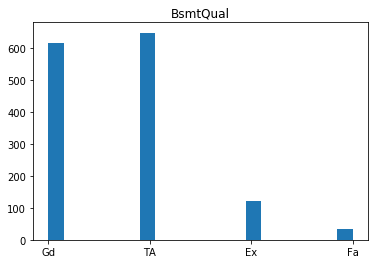

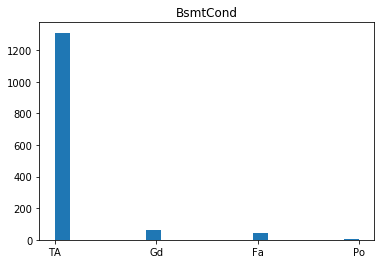

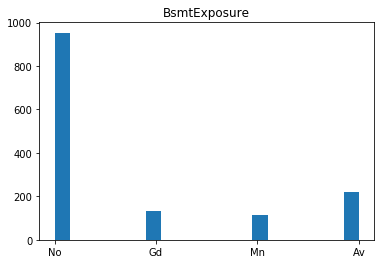

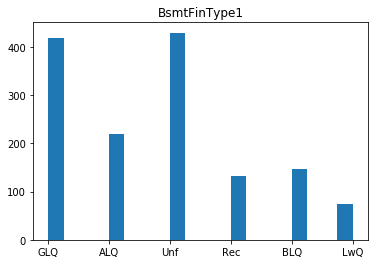

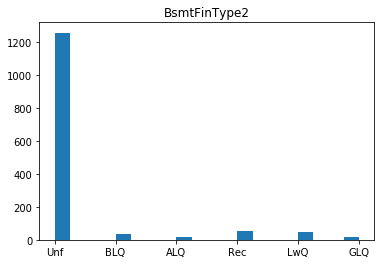

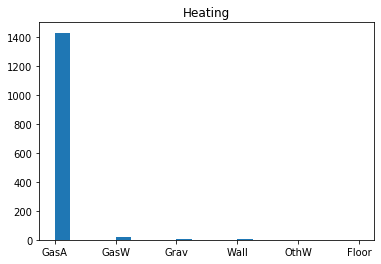

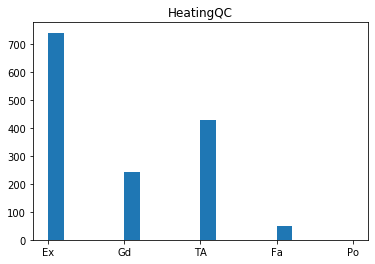

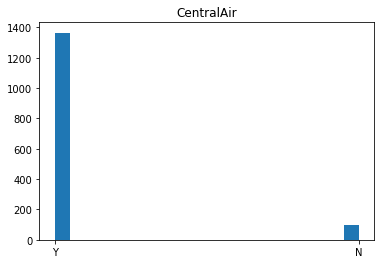

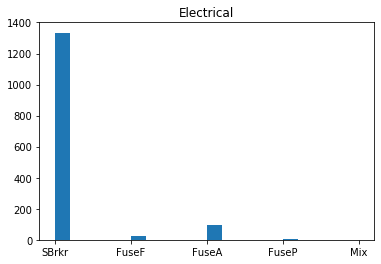

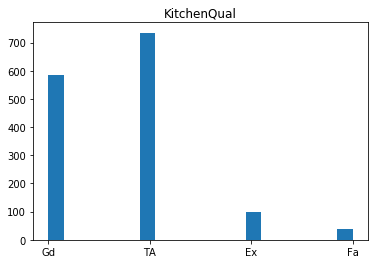

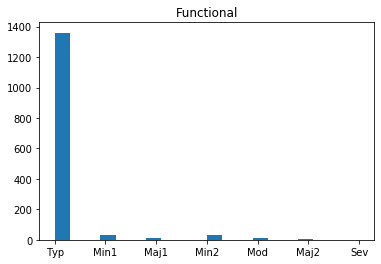

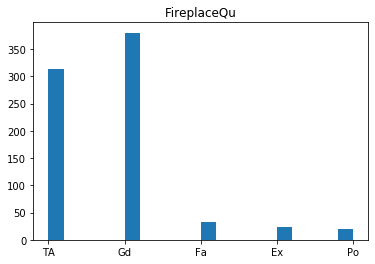

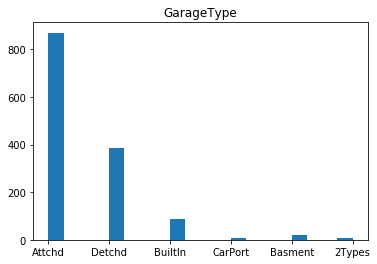

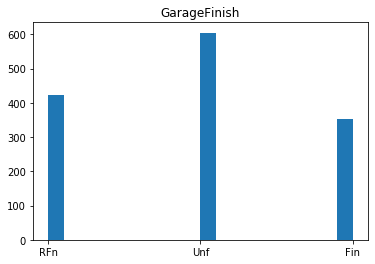

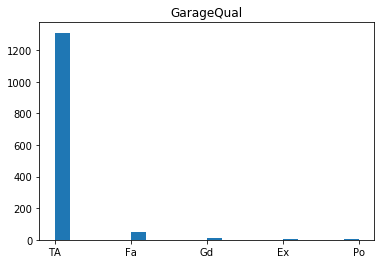

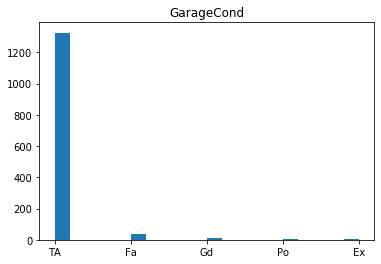

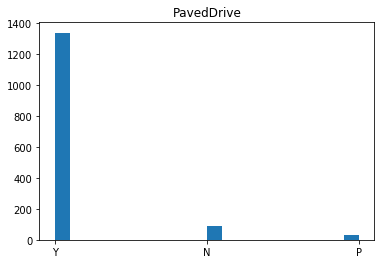

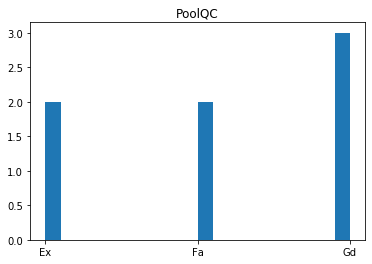

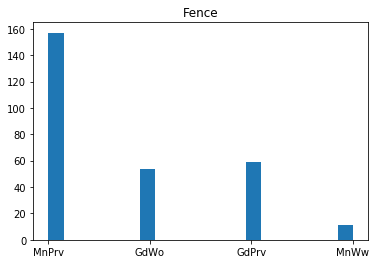

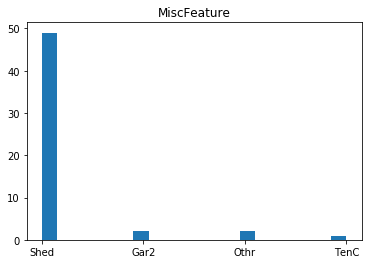

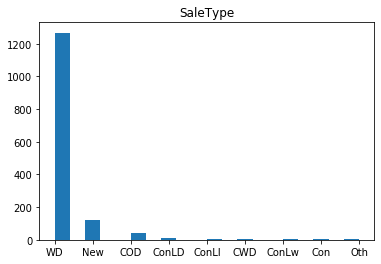

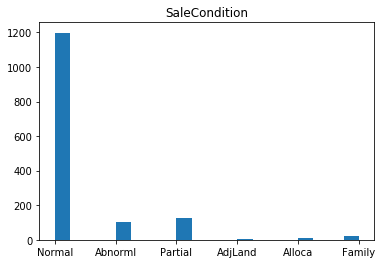

In [681]:
for i in range(0,cat):
    train[cat_cols[i]].dropna(inplace=True)
    plot_categorical(cat_cols[i])

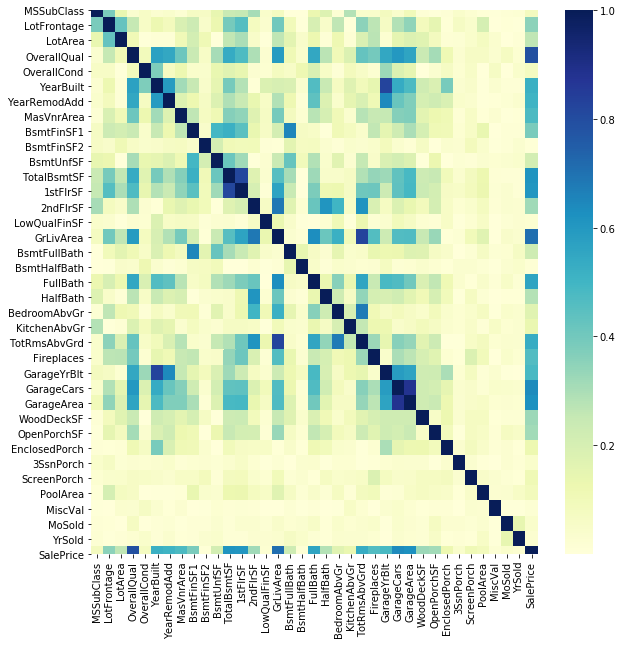

In [682]:
#Heatmap (correlation matrix)

plt.figure(figsize=[10,10])
sbn.heatmap(abs(train.corr()),cmap="YlGnBu")
plt.show()

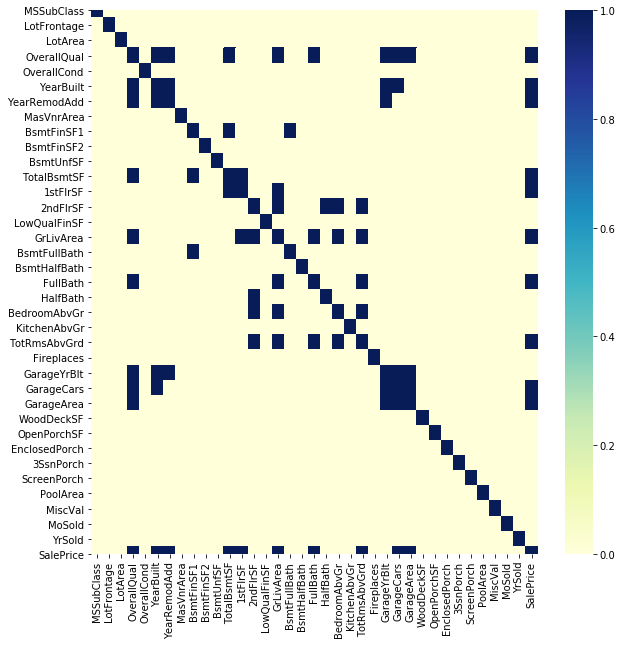

In [683]:
#Heatmap (correlation matrix with values above absolute(0.5))

plt.figure(figsize=[10,10])
sbn.heatmap(abs(train.corr())>0.5,cmap="YlGnBu")
plt.show()

### Part 2: Data Cleaning and Feature Engineering

1. MSSubClass convert to categorical feature type
2. Standardise "LotArea"
3. Delete "Street"
4. Convert "Alley" to either 0 or 1
5. Convert "LotShape" to either 0 or 1 (0 if regular, 1 otherwise)
6. Delete "Utilities"
7. Delete "LotConfig"
8. Delete "LandContour"
9. Delete "Condition2"
10. Delete "RoofMatl"
11. Create "Age"
12. Standardise "LotFrontage"
13. Normalise "OverallQual"
14. Normalise "OverallCond"
15. Create new column "remodelled" with 0 if the house wasn't remodelled and 1 if it was remodelled
16. Create new column "YearsSinceRemodelled"
17. Standardise "MasVnrArea"
18. Standardise "BsmtFinSF1"
19. Delete "BsmtFinSF2"
20. Standardise "BsmtUnfSF"
21. Standardise "TotalBsmtSF"
22. Standardise "1stFlrSF"
23. Standardise "2ndFlrSF"
24. Create "HasSecondFloor"
25. Create "LowQualFinishedSF"
26. Standardise "GrLivArea"
27. Delete "BsmtHalfBath"
28. Normalise "FullBath"
29. Normalise "BedroomAbvGr"
30. Create "HasSecondKitchen"
31. Normalise "TotRmsAbvGr"
32. Create "HasFirePlaces"
33. Create "GarageAge"
34. Normalise "GarageCars"
35. Standardise "GarageArea"
36. Standardise "WoodDeckSF"
37. Standardise "OpenPorchSF"
38. Create "HasEnclosedPorch"
39. Create "Has3SsnPorch"
40. Standardise "ScreenPorch"
41. Create "HasPool"
42. Delete "MiscVal"
43. Delete "MoSold"
44. Delete "YrSold"
45. One-hot encoding
46. Separate "SalePrice" into a separate dataframe
47. Address NaNs

In [6]:
#1

train = train.astype({'MSSubClass':'object'})

In [7]:
def normalise(column):
    scaler = MinMaxScaler()
    scaler.fit(train[[column]])
    train[column]=scaler.transform(train[[column]])

def standardise(column):
    scaler = StandardScaler()
    scaler.fit(train[[column]])
    train[column]=scaler.transform(train[[column]])

In [8]:
#2,12,17,18,20,21,22,23,26,27,29,35,36,37,40

cols_standard = ['LotArea','LotFrontage','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF',
                '1stFlrSF','2ndFlrSF','GrLivArea','BsmtHalfBath','BedroomAbvGr','GarageArea',
                'WoodDeckSF','OpenPorchSF','ScreenPorch']

for i in range(0,len(cols_standard)):
    standardise(cols_standard[i])

In [9]:
#3,6,7,8,9,10,19,42

cols_delete = ['Street','Utilities','LotConfig','LandContour','Condition2','RoofMatl','BsmtFinSF2',
              'MiscVal','MoSold','YrSold']

train.drop(columns=cols_delete,inplace=True,axis=1)

In [10]:
#4

def create_column_if_nan(row):
    if (row['Alley']=='Grvl')|(row['Alley']=='Pave'):
        return 1
    else:
        return 0

train['HasAlley'] = train.apply(lambda row: create_column_if_nan(row), axis=1)

In [11]:
train.drop('Alley',axis=1,inplace=True)

In [12]:
#5 

def create_column_if_reg(row):
    if (row['LotShape']=='Reg'):
        return 1
    else:
        return 0

train['IsRegularLotShape'] = train.apply(lambda row: create_column_if_reg(row), axis=1)

In [13]:
#11

train['Age'] = train.apply(lambda row: 2011-row.YearBuilt, axis=1)

In [14]:
#13,14,28,31,34

cols_normalise = ['OverallQual','OverallCond','FullBath','TotRmsAbvGrd','GarageCars']

for i in range(0,len(cols_normalise)):
    normalise(cols_normalise[i])

In [15]:
#15

def create_column_if_remodelled(row):
    if (row['YearRemodAdd']==row['YearBuilt']):
        return 1
    else:
        return 0

train['WasRemodelled'] = train.apply(lambda row: create_column_if_remodelled(row), axis=1)

In [16]:
#16 

train['YearsSinceRemodelled'] = train.apply(lambda row: 2011-row.YearRemodAdd, axis=1)

In [17]:
train.drop('YearBuilt',axis=1,inplace=True)

In [18]:
train.drop('YearRemodAdd',axis=1,inplace=True)

In [19]:
#24

def create_column_if_second_floor(row):
    if row['2ndFlrSF']!=0:
        return 1
    else:
        return 0

train['HasSecondFloor'] = train.apply(lambda row: create_column_if_second_floor(row), axis=1)

In [20]:
#25

def create_column_if_low_qual_finished_sf(row):
    if row['LowQualFinSF']!=0:
        return 1
    else:
        return 0

train['LowQualFinishedSF'] = train.apply(lambda row: create_column_if_low_qual_finished_sf(row), axis=1)

In [21]:
train.drop('LowQualFinSF',axis=1,inplace=True)

In [22]:
#30

def create_column_if_second_kitchen(row):
    if (row['KitchenAbvGr']>1):
        return 1
    else:
        return 0

train['HasSecondKitchen'] = train.apply(lambda row: create_column_if_second_kitchen(row), axis=1)

In [23]:
train.drop('KitchenAbvGr',axis=1,inplace=True)

In [24]:
#32 

def create_column_if_fireplaces(row):
    if (row['Fireplaces']>0):
        return 1
    else:
        return 0

train['HasFirePlaces'] = train.apply(lambda row: create_column_if_fireplaces(row), axis=1)

In [25]:
train.drop('Fireplaces',axis=1,inplace=True)

In [26]:
#33

train['GarageAge'] = train.apply(lambda row: 2011-row.GarageYrBlt, axis=1)

In [27]:
train.drop('GarageYrBlt',axis=1,inplace=True)

In [28]:
#38

def create_column_if_enclosed_porch(row):
    if (row['EnclosedPorch']>0):
        return 1
    else:
        return 0

train['HasEnclosedPorch'] = train.apply(lambda row: create_column_if_enclosed_porch(row), axis=1)

In [29]:
train.drop('EnclosedPorch',axis=1,inplace=True)

In [30]:
#39

def create_column_if_3ssn_porch(row):
    if (row['3SsnPorch']>0):
        return 1
    else:
        return 0

train['Has3SsnPorch'] = train.apply(lambda row: create_column_if_3ssn_porch(row), axis=1)

In [31]:
train.drop('3SsnPorch',axis=1,inplace=True)

In [32]:
#41

def create_column_if_pool(row):
    if (row['PoolArea']>0):
        return 1
    else:
        return 0

train['HasPool'] = train.apply(lambda row: create_column_if_pool(row), axis=1)

In [33]:
train.drop('PoolArea',axis=1,inplace=True)

In [34]:
#45

train = pd.get_dummies(train)

In [35]:
#46

target = train[['SalePrice']]
train.drop('SalePrice',axis=1,inplace=True)

In [36]:
#47

train = train.fillna(0)

In [37]:
train.drop(columns=['Electrical_Mix','Exterior1st_ImStucc','Exterior1st_Stone','Exterior2nd_Other',
                   'GarageQual_Ex','Heating_Floor','Heating_OthW','HouseStyle_2.5Fin','MiscFeature_TenC',
                   'PoolQC_Fa'],axis=1,inplace=True)

In [40]:
from sklearn.decomposition import PCA

### Part 3: Building a model

In [56]:
X_train, X_test, y_train, y_test = train_test_split(train,target)

In [69]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear',colsample_bytree = 0.3,learning_rate = 0.1,
                max_depth=5,n_estimators=150,alpha=10)
xg_reg.fit(X_train,y_train)
xgb_predictions = xg_reg.predict(X_test)

[11:04:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [70]:
np.sqrt(mean_squared_log_error(xgb_predictions,y_test))

0.13699690754459046

In [89]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

In [90]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth':5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix,params=params, nfold=5,
                    num_boost_round=500,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
cv_results.tail(5)

[10:48:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:48:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:48:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:48:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:48:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
177,7599.357910,350.256264,31888.421875,12562.353958
178,7580.916407,350.239679,31888.547266,12564.043373
179,7561.063184,346.020541,31882.570313,12559.490847
180,7532.868945,351.495146,31881.474609,12557.757538
181,7511.368652,351.106545,31880.903906,12556.668196


In [897]:
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)
lin_predictions = linear_reg.predict(X_test)

In [938]:
np.sqrt(mean_squared_log_error(lin_predictions,y_test))

0.19887353483352677

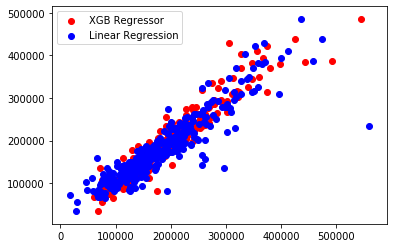

In [899]:
plt.scatter(xgb_predictions,y_test,color='r',label='XGB Regressor')
plt.scatter(lin_predictions,y_test,color='b',label='Linear Regression')
plt.legend()
plt.show()

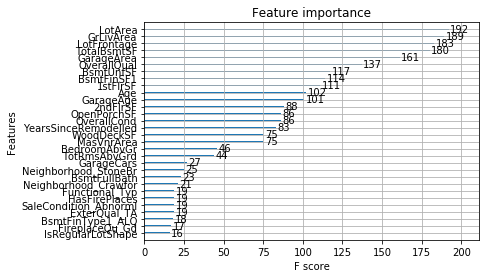

In [900]:
xgb.plot_importance(xg_reg,max_num_features=30)
plt.figure
plt.show()

### Part 4: Submission

In [46]:
test.set_index('Id',inplace=True)

In [47]:
test = test.astype({'MSSubClass':'object'})

def normalise_1(column):
    scaler = MinMaxScaler()
    scaler.fit(test[[column]])
    test[column]=scaler.transform(test[[column]])

def standardise_1(column):
    scaler = StandardScaler()
    scaler.fit(test[[column]])
    test[column]=scaler.transform(test[[column]])

In [48]:
#2,12,17,18,20,21,22,23,26,27,29,35,36,37,40

cols_standard = ['LotArea','LotFrontage','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF',
                '1stFlrSF','2ndFlrSF','GrLivArea','BsmtHalfBath','BedroomAbvGr','GarageArea',
                'WoodDeckSF','OpenPorchSF','ScreenPorch']

for i in range(0,len(cols_standard)):
    standardise_1(cols_standard[i])

In [49]:
#3,6,7,8,9,10,19,42

cols_delete = ['Street','Utilities','LotConfig','LandContour','Condition2','RoofMatl','BsmtFinSF2',
              'MiscVal','MoSold','YrSold']

test.drop(columns=cols_delete,inplace=True,axis=1)

In [50]:
#4

def create_column_if_nan(row):
    if (row['Alley']=='Grvl')|(row['Alley']=='Pave'):
        return 1
    else:
        return 0

test['HasAlley'] = test.apply(lambda row: create_column_if_nan(row), axis=1)

In [51]:
test.drop('Alley',axis=1,inplace=True)

In [52]:
#5 

def create_column_if_reg(row):
    if (row['LotShape']=='Reg'):
        return 1
    else:
        return 0

test['IsRegularLotShape'] = test.apply(lambda row: create_column_if_reg(row), axis=1)

In [53]:
#11

test['Age'] = test.apply(lambda row: 2011-row.YearBuilt, axis=1)

In [54]:
#13,14,28,31,34

cols_normalise = ['OverallQual','OverallCond','FullBath','TotRmsAbvGrd','GarageCars']

for i in range(0,len(cols_normalise)):
    normalise_1(cols_normalise[i])

In [55]:
#15

def create_column_if_remodelled(row):
    if (row['YearRemodAdd']==row['YearBuilt']):
        return 1
    else:
        return 0

test['WasRemodelled'] = test.apply(lambda row: create_column_if_remodelled(row), axis=1)

In [56]:
#16 

test['YearsSinceRemodelled'] = test.apply(lambda row: 2011-row.YearRemodAdd, axis=1)

In [57]:
test.drop('YearBuilt',axis=1,inplace=True)

In [58]:
test.drop('YearRemodAdd',axis=1,inplace=True)

In [59]:
#24

def create_column_if_second_floor(row):
    if row['2ndFlrSF']!=0:
        return 1
    else:
        return 0

test['HasSecondFloor'] = test.apply(lambda row: create_column_if_second_floor(row), axis=1)

In [60]:
#25

def create_column_if_low_qual_finished_sf(row):
    if row['LowQualFinSF']!=0:
        return 1
    else:
        return 0

test['LowQualFinishedSF'] = test.apply(lambda row: create_column_if_low_qual_finished_sf(row), axis=1)

In [61]:
test.drop('LowQualFinSF',axis=1,inplace=True)

In [62]:
#30

def create_column_if_second_kitchen(row):
    if (row['KitchenAbvGr']>1):
        return 1
    else:
        return 0

test['HasSecondKitchen'] = test.apply(lambda row: create_column_if_second_kitchen(row), axis=1)

In [63]:
test.drop('KitchenAbvGr',axis=1,inplace=True)

In [64]:
#32 

def create_column_if_fireplaces(row):
    if (row['Fireplaces']>0):
        return 1
    else:
        return 0

test['HasFirePlaces'] = test.apply(lambda row: create_column_if_fireplaces(row), axis=1)

In [65]:
test.drop('Fireplaces',axis=1,inplace=True)

In [66]:
#33

test['GarageAge'] = test.apply(lambda row: 2011-row.GarageYrBlt, axis=1)

In [67]:
test.drop('GarageYrBlt',axis=1,inplace=True)

In [68]:
#38

def create_column_if_enclosed_porch(row):
    if (row['EnclosedPorch']>0):
        return 1
    else:
        return 0

test['HasEnclosedPorch'] = test.apply(lambda row: create_column_if_enclosed_porch(row), axis=1)

In [69]:
test.drop('EnclosedPorch',axis=1,inplace=True)

In [70]:
#39

def create_column_if_3ssn_porch(row):
    if (row['3SsnPorch']>0):
        return 1
    else:
        return 0

test['Has3SsnPorch'] = test.apply(lambda row: create_column_if_3ssn_porch(row), axis=1)

In [71]:
test.drop('3SsnPorch',axis=1,inplace=True)

In [72]:
#41

def create_column_if_pool(row):
    if (row['PoolArea']>0):
        return 1
    else:
        return 0

test['HasPool'] = test.apply(lambda row: create_column_if_pool(row), axis=1)

In [73]:
test.drop('PoolArea',axis=1,inplace=True)

In [74]:
#45

test = pd.get_dummies(test)

In [75]:
#47

test = test.fillna(0)

In [76]:
test.drop('MSSubClass_150',axis=1,inplace=True)

In [108]:
#MAKE A PREDICTION

prediction = xg_reg.predict(test)

In [109]:
indexes = test.index.tolist()

In [110]:
submission=pd.DataFrame(index=indexes,data=prediction,columns=['SalePrice'])

In [111]:
submission.index.names = ['Id']

In [112]:
submission.to_csv('submission.csv')